In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1080 Ti (UUID: GPU-d9c5fed3-cb5b-a851-7956-c16fb36d2249)
GPU 1: NVIDIA GeForce GTX 1080 Ti (UUID: GPU-c226cb77-a30d-4960-a433-c287ef9b66bb)
GPU 2: NVIDIA GeForce GTX 1080 Ti (UUID: GPU-352fd5d3-bbea-6939-14b8-5113586e7936)
GPU 3: NVIDIA GeForce GTX 1080 Ti (UUID: GPU-0cefea6d-fdf1-ba03-6451-057a717a9977)


In [ ]:
from lizard import lizard

In [12]:
lizard(3)

3


3

In [3]:
from fla import *

ModuleNotFoundError: No module named 'triton'

### Matmul

##### numpy

In [2]:
from typing import overload

import numpy as np
import numpy.typing as npt

ModuleNotFoundError: No module named 'numpy._typing'

In [3]:
@overload
def matmul(a: npt.NDArray[np.float32], b: npt.NDArray[np.float32]) -> np.ndarray: ...

NameError: name 'npt' is not defined

In [4]:
def matmul(a, b):
    return a @ b

In [5]:
matmul(np.ones([1, 4], dtype='f'), np.ones([4, 1], dtype='f'))

array([[4.]], dtype=float32)

In [6]:
A = np.array([[1.0, 2.0], [3.0, 4.0]], dtype='f')
B = np.array([[5.0, 6.0], [7.0, 8.0]], dtype='f')
C = np.array([[19.0, 22.0], [43.0, 50.0]])
assert np.allclose(matmul(A, B), C), "failed."

In [7]:
A = np.array([1.0, 2.0, 3.0], dtype='f')
B = np.array([[4.0], [5.0], [6.0]], dtype='f')
C = np.array([[32.0]])
assert np.allclose(matmul(A, B), C), "failed."

In [8]:
A = np.random.rand(8192, 6144)
B = np.random.rand(6144, 4096)

In [9]:
import timeit
result = timeit.timeit('matmul(A, B)', globals=globals(), number=1)

In [10]:
result

2.9918631967157125

In [11]:
result = timeit.timeit('matmul(A, B)', globals=globals(), number=10)


In [12]:
result

28.23522245278582

In [13]:
import cProfile, pstats

cProfile.run('matmul(A, B)', 'profiler')
pstats.Stats('profiler').strip_dirs().sort_stats('tottime').print_stats()

Mon Nov  3 14:57:35 2025    profiler

         4 function calls in 2.589 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.588    2.588    2.588    2.588 1857896467.py:1(matmul)
        1    0.001    0.001    2.589    2.589 <string>:1(<module>)
        1    0.000    0.000    2.589    2.589 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [14]:
def profile(matmul, a, b):
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()
    matmul(a, b)
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('tottime')
    stats.print_stats()

In [15]:
profile(matmul, A, B)

         2 function calls in 2.651 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.651    2.651    2.651    2.651 /tmp/ipykernel_797732/1857896467.py:1(matmul)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [16]:
!pip install snakeviz


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [17]:
%load_ext snakeviz
%snakeviz matmul(A, B)


 
*** Profile stats marshalled to file '/tmp/tmpdoimyzvw'.
Embedding SnakeViz in this document...
<function display at 0x7f09006c2940>


#### PyTorch

In [18]:
! pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.0/888.0 MB 22.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 26.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 37.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 26.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 43.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 45.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 50.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288

In [19]:
import torch

In [20]:
torch.__version__

'2.8.0+cu128'

In [21]:
@overload
def matmul_pytorch(a: ..., b: ...): ...

In [22]:
def matmul_pytorch(a, b):
    import torch
    return torch.matmul(a, b)

In [23]:
A = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
B = torch.tensor([[5.0, 6.0], [7.0, 8.0]])
C = torch.tensor([[19.0, 22.0], [43.0, 50.0]])

In [24]:
assert torch.allclose(matmul_pytorch(A, B), C), "failed"

In [25]:
A = torch.tensor(np.random.rand(8192, 6144), device="cpu")
B = torch.tensor(np.random.rand(6144, 4096), device="cpu")

In [26]:
import cProfile, pstats

cProfile.run('matmul_pytorch(A, B)', 'profiler')
pstats.Stats('profiler').strip_dirs().sort_stats('tottime').print_stats()

Mon Nov  3 15:05:23 2025    profiler

         5 function calls in 2.412 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.412    2.412    2.412    2.412 {built-in method torch.matmul}
        1    0.001    0.001    2.412    2.412 <string>:1(<module>)
        1    0.000    0.000    2.412    2.412 {built-in method builtins.exec}
        1    0.000    0.000    2.412    2.412 2296730478.py:1(matmul_pytorch)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [27]:
%load_ext snakeviz
%snakeviz matmul_pytorch(A, B)


The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
 
*** Profile stats marshalled to file '/tmp/tmpsxlut9d7'.
Embedding SnakeViz in this document...
<function display at 0x7f09006c2940>


NVIDIA T4 GPU 

- Turing Architecture
- No HBM - only uses GDDR6
- 2560 Tensor Core
- 40 SMs
---

- L0 - warp-level cache
- L1 cache + shared memory (64-128 KB per SM)
- L2 cache (4 MB global)
- GDDRM6 VRAM (16 GB, 320 GB/s)

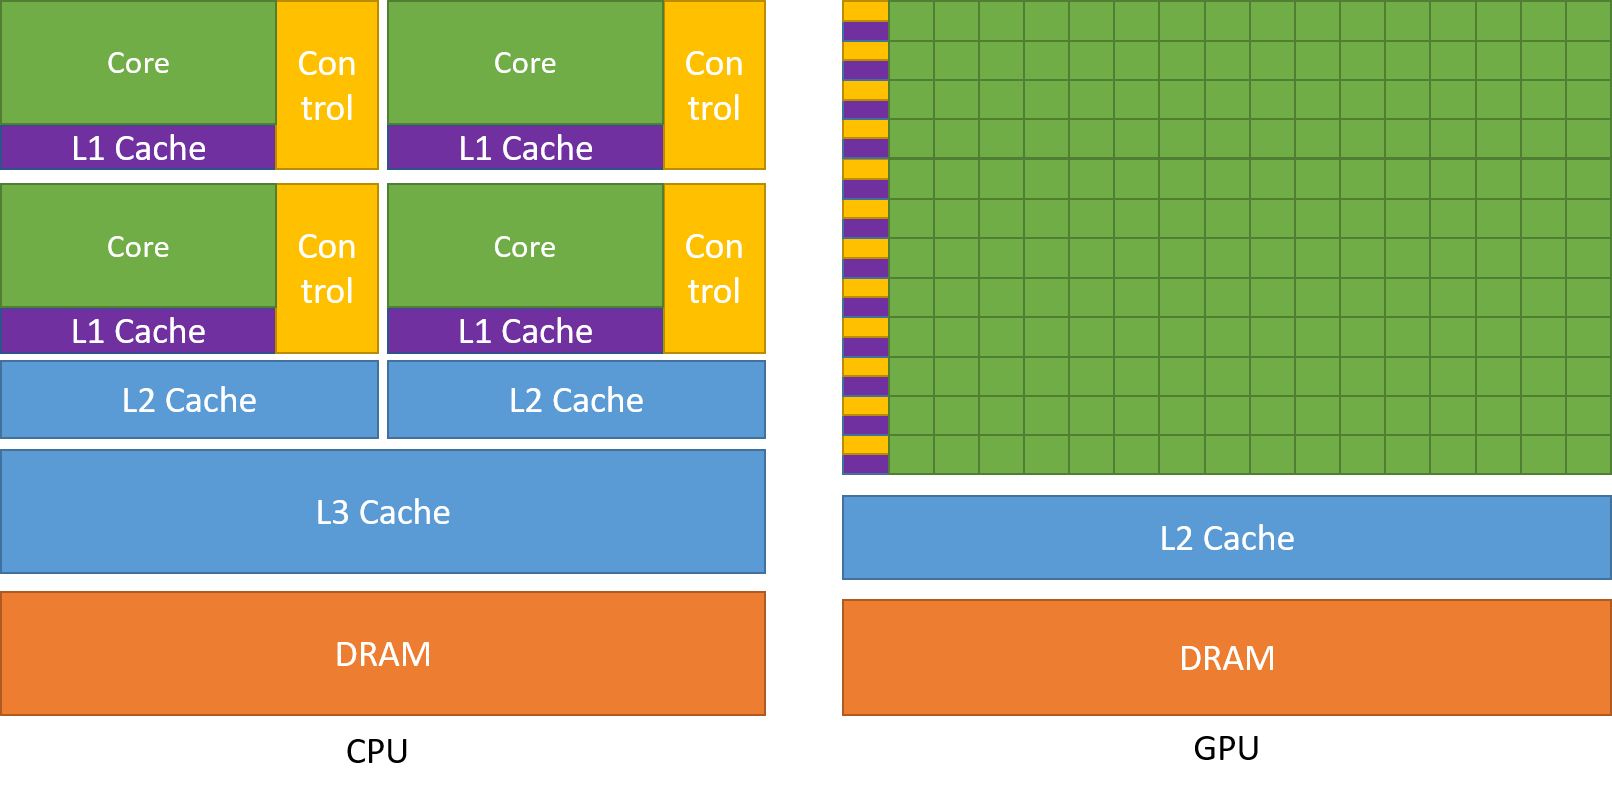

#### Triton

In [39]:
!pip install -r ../requirements.institue

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 27.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 36.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 28.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 41.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nvidia-cublas-cu12
    Found existing installation: nvidia-cublas-cu12 12.8.4.1
    Uninstalling nvidia-cublas-cu12-12.8.4.1:
      Successfully uninstalled nvidia-cublas-cu12-12.8.4.1
  You can safely remove it manually.
  Attempting uninstall: nvidia-cusolver-cu12
    Found existing installation: nvidia-cusolver-cu12 11.7.3.90
    Uninstalling nvidia-cusolver-cu12-11.7.3.90:
      Successfully uninstalled nvidia-cusolver-cu12-11.7.3.90
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12

In [2]:
!pip install -r ../requirements.colab

  Using cached triton-2.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
  Using cached torch-2.9.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)

In [1]:
import torch
torch.__version__

'2.1.2+cu121'

In [2]:
@overload
def matmul_triton_naive(A, B): ...

NameError: name 'overload' is not defined

In [3]:
import triton
import triton.language as tl


def matmul_triton_naive(A, B, dtype="float32"):
    M, K = A.shape
    K2, N = B.shape
    assert K == K2
    # assert A.dtype == dtype

    import torch
    C = torch.empty((M, N), device=A.device, dtype=A.dtype)

    grid = (M, N)
    @triton.jit
    def kernel(
        A, B, C, M, N, K
    ):
        m = tl.program_id(0)
        n = tl.program_id(1)
        
        if m >= M or n >= N:
            return
        
        sum = 0.0
        for k in range(K):
            a = tl.load(A + m*K + k)
            b = tl.load(B + k*N + n)
            sum += a * b

        tl.store(C + m*N + n, sum)

    kernel[grid](
        A, B, C,
        M, N, K,
    )

    return C

In [4]:
def profile_triton(size):
    import cProfile, pstats
    profiler = cProfile.Profile()
    profiler.enable()

    import torch

    M = N = K = size
    A = torch.randn((M, K), device="cuda", dtype=torch.float32)
    B = torch.randn((K, N), device="cuda", dtype=torch.float32)

    C = matmul_triton_naive(A, B)
    
    profiler.disable()
    stats = pstats.Stats(profiler).sort_stats('tottime')
    stats.print_stats()

    return torch.allclose(C, A @ B, atol=1e-4)

In [ ]:
!python3-config --includes

/bin/bash: line 1: python3-config: command not found


In [8]:
!module load python/3.9
!module load gcc

ERROR: Unable to locate a modulefile for 'python/3.9'
ERROR: Unable to locate a modulefile for 'gcc'
>

In [5]:
profile_triton(32)

/tmp/tmprptoruas/main.c:4:10: fatal error: Python.h: No such file or directory
    4 | #include <Python.h>
      |          ^~~~~~~~~~
compilation terminated.


CalledProcessError: Command '['/usr/bin/gcc', '/tmp/tmprptoruas/main.c', '-O3', '-I/system/user/khashan/.local/lib/python3.9/site-packages/triton/common/../third_party/cuda/include', '-I/usr/include/python3.9', '-I/tmp/tmprptoruas', '-shared', '-fPIC', '-lcuda', '-o', '/tmp/tmprptoruas/kernel.cpython-39-x86_64-linux-gnu.so', '-L/lib64', '-L/lib', '-L/lib64', '-L/lib']' returned non-zero exit status 1.

In [40]:
profile_triton(64)

         3913 function calls (3802 primitive calls) in 0.007 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 {built-in method torch.randn}
      260    0.000    0.000    0.001    0.000 /usr/lib/python3.12/tokenize.py:577(_generate_tokens_from_c_tokenizer)
        2    0.000    0.000    0.001    0.001 /usr/lib/python3.12/inspect.py:1239(getblock)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        8    0.000    0.000    0.000    0.000 {built-in method _io.open}
        1    0.000    0.000    0.000    0.000 {built-in method cuda_utils.get_device_properties}
      258    0.000    0.000    0.000    0.000 /usr/lib/python3.12/collections/__init__.py:447(_make)
       15    0.000    0.000    0.000    0.000 {built-in method posix.stat}
        1    0.000    0.000    0.004    0.004 /usr/local/lib/python3.12/dist-packages/triton/runtime/jit.py:355(run)

True

In [41]:
profile_triton(128)

         3882 function calls (3778 primitive calls) in 0.009 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.004    0.004 /usr/local/lib/python3.12/dist-packages/triton/runtime/jit.py:432(__init__)
        8    0.001    0.000    0.001    0.000 {built-in method _io.open}
        2    0.000    0.000    0.000    0.000 {built-in method torch.randn}
      260    0.000    0.000    0.001    0.000 /usr/lib/python3.12/tokenize.py:577(_generate_tokens_from_c_tokenizer)
        2    0.000    0.000    0.001    0.000 /usr/lib/python3.12/inspect.py:1239(getblock)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        1    0.000    0.000    0.000    0.000 {built-in method cuda_utils.get_device_properties}
      258    0.000    0.000    0.000    0.000 /usr/lib/python3.12/collections/__init__.py:447(_make)
        1    0.000    0.000    0.000    0.000 {built-in method cuda_u

True

In [42]:
profile_triton(1024)

         3881 function calls (3776 primitive calls) in 0.009 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.004    0.002    0.004    0.002 /usr/local/lib/python3.12/dist-packages/triton/runtime/cache.py:47(__init__)
        1    0.000    0.000    0.000    0.000 {built-in method torch.empty}
      260    0.000    0.000    0.000    0.000 /usr/lib/python3.12/tokenize.py:577(_generate_tokens_from_c_tokenizer)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        2    0.000    0.000    0.000    0.000 {built-in method torch.randn}
       15    0.000    0.000    0.000    0.000 {built-in method posix.stat}
        2    0.000    0.000    0.001    0.000 /usr/lib/python3.12/inspect.py:1239(getblock)
        8    0.000    0.000    0.000    0.000 {built-in method _io.open}
        1    0.000    0.000    0.000    0.000 {built-in method cuda_utils.get_device_properties}
       14    0.000

True

In [43]:
profile_triton(4096)

         3882 function calls (3778 primitive calls) in 0.006 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 {built-in method torch.randn}
      260    0.000    0.000    0.000    0.000 /usr/lib/python3.12/tokenize.py:577(_generate_tokens_from_c_tokenizer)
        1    0.000    0.000    0.000    0.000 {built-in method torch.empty}
        2    0.000    0.000    0.001    0.000 /usr/lib/python3.12/inspect.py:1239(getblock)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        2    0.000    0.000    0.005    0.002 /usr/lib/python3.12/selectors.py:451(select)
        8    0.000    0.000    0.000    0.000 {built-in method _io.open}
      258    0.000    0.000    0.000    0.000 /usr/lib/python3.12/collections/__init__.py:447(_make)
        1    0.000    0.000    0.000    0.000 {built-in method cuda_utils.get_device_properties}
        1    0.000    0.

KeyboardInterrupt: 